# House Price Prediction

## Learning Data Cleaning and Preprocessing by building a house price prediction model

### Note: I created this project to learn Data cleaning and preprocessing straight after completing the first 2 section of [This Course](https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/). There might be many things I've done wrong and could improve as I learn more.

#### The Datasets I will be using is [California House Price](https://www.kaggle.com/datasets/shibumohapatra/house-price) found in Kaggle. This dataset has

#### [Greate Video on Data Preparing](https://www.youtube.com/watch?v=P8ERBy91Y90)

## This notebook is used to learn how to choose correct data, clean (add or remove missing data) and process to get it ready for training the model


## Importing modules

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
## Reading the Data

df = pd.read_csv("./Desktop/Deep Learning TensorFlow Course/Data sets/house-price/Housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


## Visualising our Data

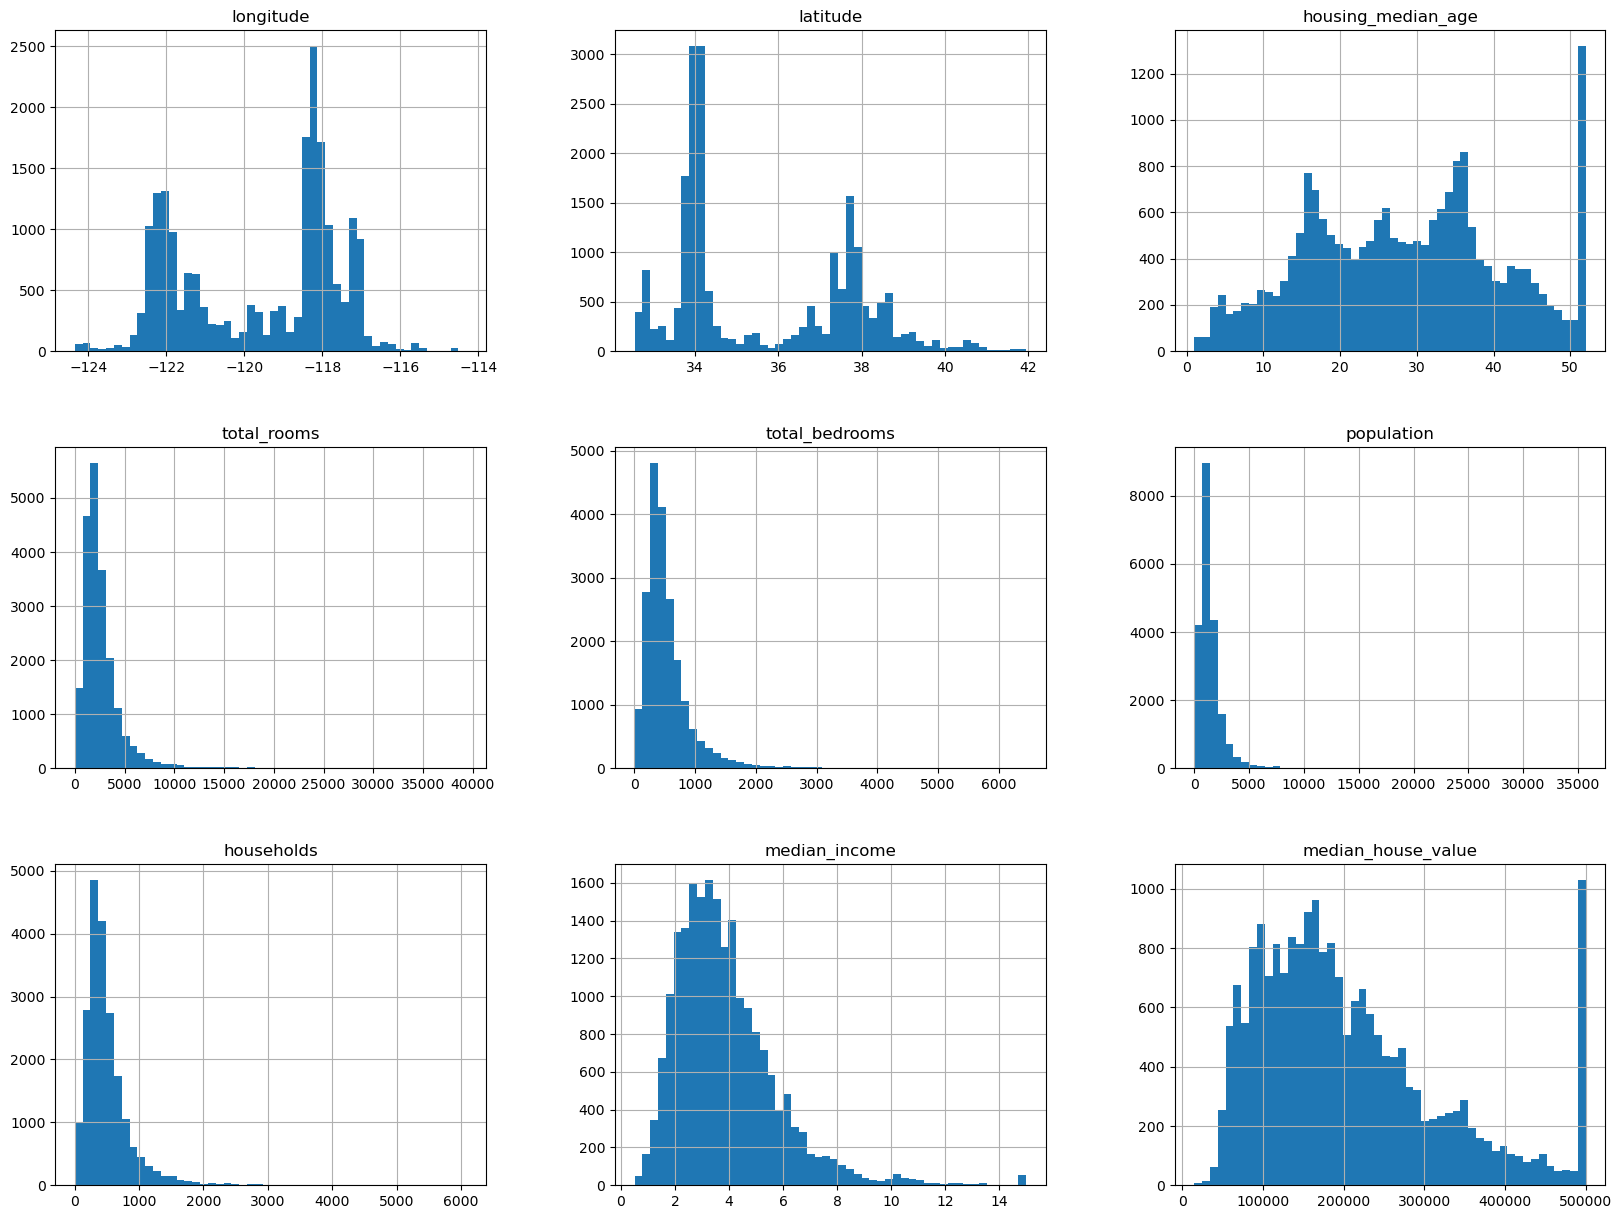

In [ ]:
df.columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

## Checking the Datasets info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# 5 Data Cleaning Techniques

#### Website 1: https://dataheroes.ai/blog/data-cleaning-techniques-for-better-ml-models/

#### Website 2: https://www.kdnuggets.com/2023/08/7-steps-mastering-data-cleaning-preprocessing-techniques.html

## 1. Handling Missing Values

#### First we need to check if there are values missing in the datasets

## Checking for any missing data the WRONG WAY
Now that we have the data, its time to clean and preprocess it.

Note:  **df.isnull() != df.isnull().any()**

**df.isnull() will ONLY check first few and last few rows NOT WHOLE datasets**

**df.isnull().any() will check the WHOLE datasets**

### Example of ```df.isnull()```

In [ ]:
null_df = house_data.isnull()
print(null_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  households  median_income  ocean

## Checking for missing datasets the RIGHT WAY

In [ ]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

## Now we can see that there are missing data for ```total_bedroom```
### Check how many missing data are there in total

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

## There are total of 207 missing data in ```total_bedroom```

## Fill the missing data using the ```mean``` of ```total_room```

Website: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [ ]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

## Now that we fillend missing data for ```total_bedrooms``` let's look at it again

In [ ]:
df.isnull().any(), df.isnull().sum()

(longitude             False
 latitude              False
 housing_median_age    False
 total_rooms           False
 total_bedrooms        False
 population            False
 households            False
 median_income         False
 ocean_proximity       False
 median_house_value    False
 dtype: bool,
 longitude             0
 latitude              0
 housing_median_age    0
 total_rooms           0
 total_bedrooms        0
 population            0
 households            0
 median_income         0
 ocean_proximity       0
 median_house_value    0
 dtype: int64)

## Now there are no missing data, we can visualise the data againdf.columns


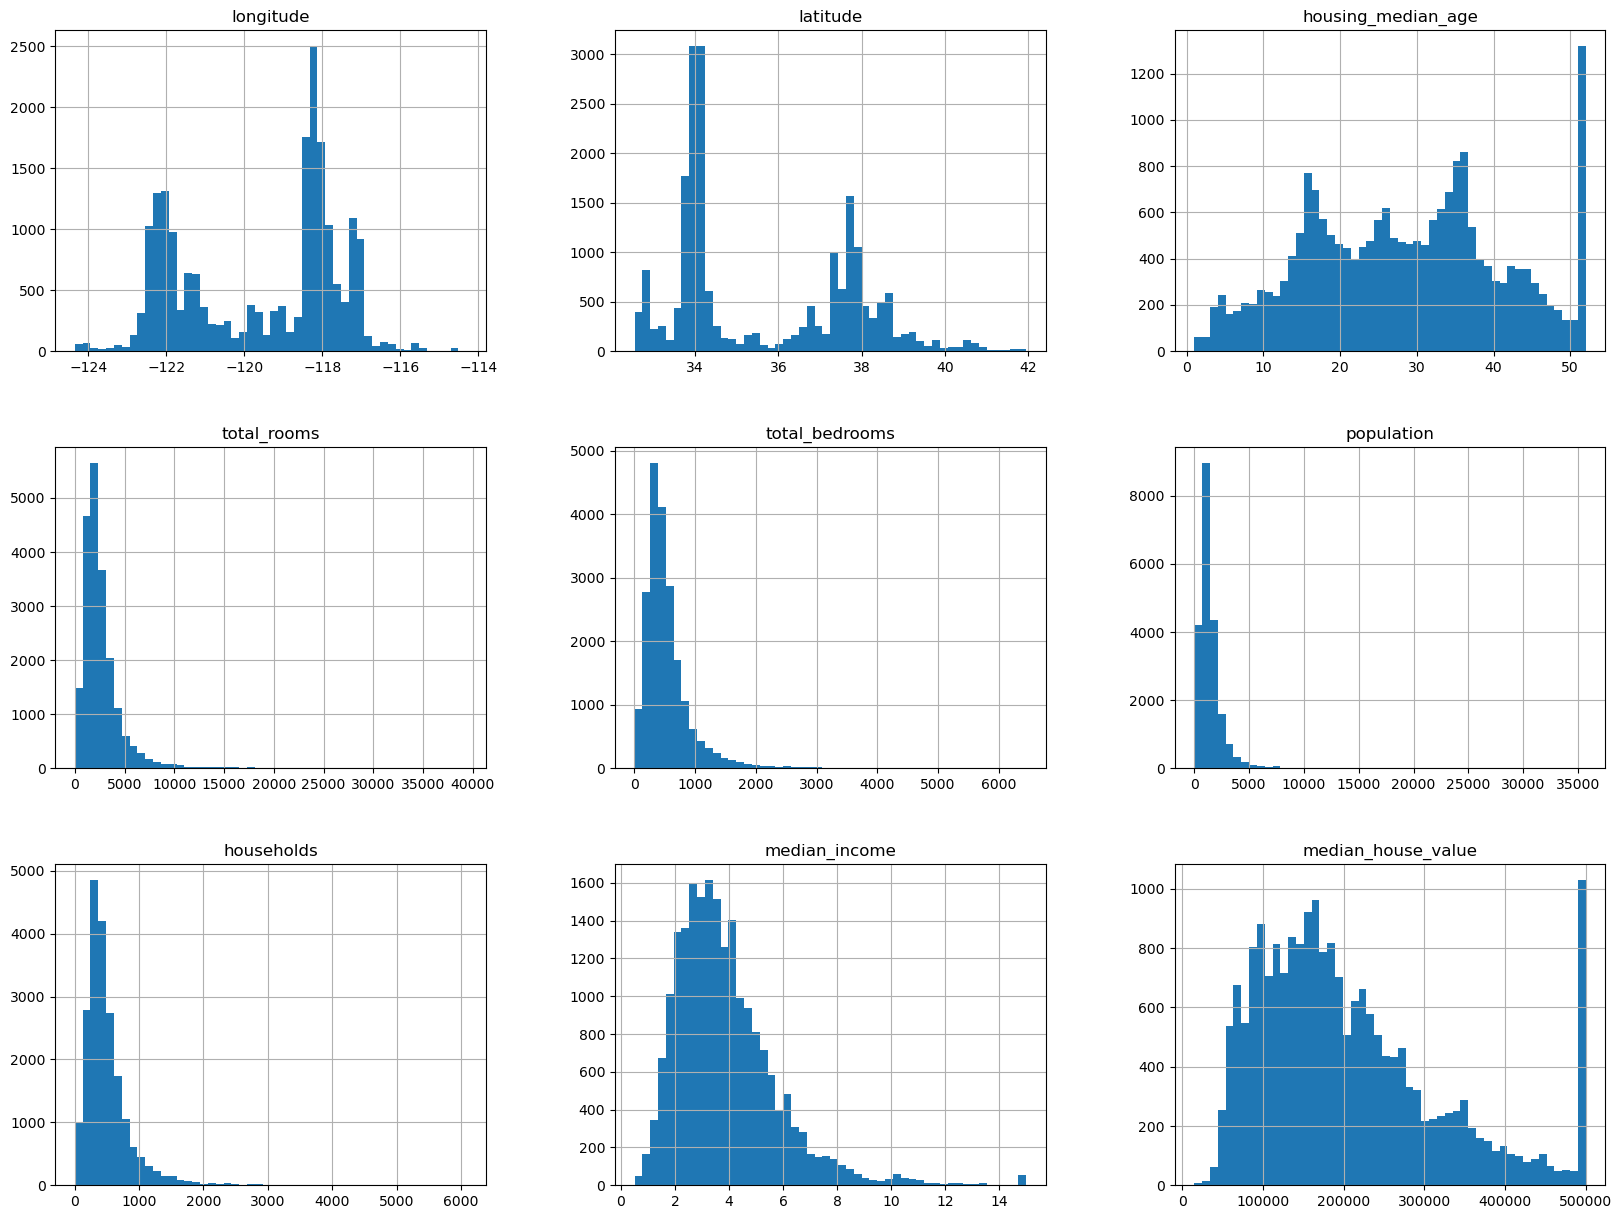

In [ ]:
df.columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

## 2. Remove Duplicate Data

### Now this dataset doesn't have any duplicate data however, check check if there any duplicat data and remove if there any.

### Check for duplicate data

In [ ]:
# Find duplicate rows
duplicate_df = df.duplicated().any()
print(duplicate_df)

False


## There are no duplicate data, however incase there any duplicate data then following steps will remove any

In [ ]:
df_clean = df.drop_duplicates()
print(df_clean)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_

## 2. 1 Removing usless data

#### We don't need the ```longitude``` & ```latitude``` so we can remove these data

In [ ]:
df = df.drop(['longitude', 'latitude'], axis=1)
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### ✅ **3. Handling Outliers**

**Outliers** are data points that are significantly different from the majority of the data. They lie at the extreme ends of a distribution and can potentially skew statistical analyses and model performance.

#### 📌 Example:
Imagine you're calculating the average age of a group of 10,000 people. Most people are between 20 and 60 years old, but there are a few individuals who are over 100 years old. These extremely high ages are considered **outliers** because they deviate strongly from the rest of the data.

#### 🔧 Common Methods to Handle Outliers:
- **Remove** the outliers if they're errors or irrelevant.
- **Cap** the values (e.g., limit ages to 99).
- **Transform** the data (e.g., apply a log transformation).
- **Use models robust to outliers** (like tree-based models).

---

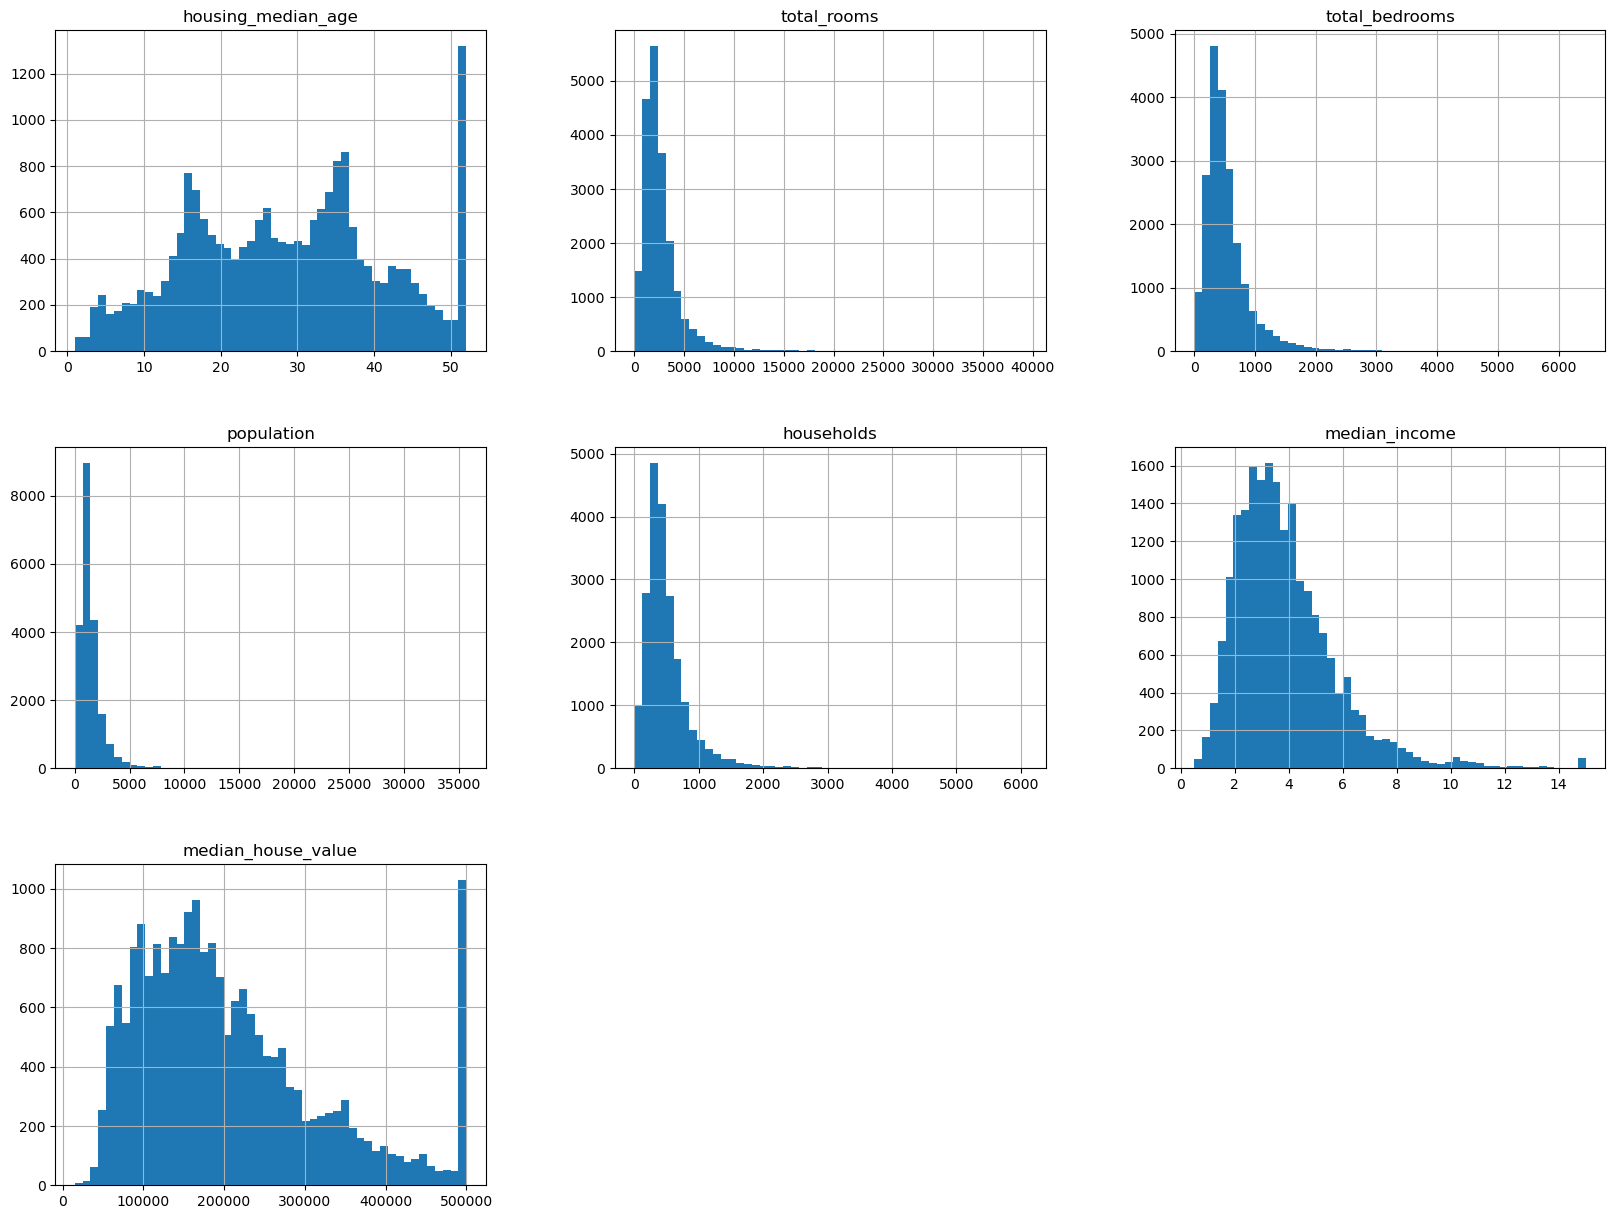

In [ ]:
df.columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

## Visualising Our Data to see Outliers

## In our datasets there are zero Outliers

### Code for replace extream ends result

## Now that we cleaned up the data a bit lets check the shape of the data

In [ ]:
df.shape

(20640, 8)

## 4. Standardizing Data

### We need to turn our data into numbers to common scale, machine can only understand numbers.

In [ ]:
# df['ocean_proximity'].unique()

### Categorical data

#### We can turn the ```ocean_proximity``` text values into number by assigning them unique list values

In [ ]:
# df['ocean_proximity'] = df['ocean_proximity'].map({
#     'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2,  'NEAR OCEAN': 3, 'ISLAND': 4
# })

In [ ]:
# df['ocean_proximity'].unique()

In [ ]:
df.head

<bound method NDFrame.head of        housing_median_age  total_rooms  total_bedrooms  population  \
0                      41          880           129.0         322   
1                      21         7099          1106.0        2401   
2                      52         1467           190.0         496   
3                      52         1274           235.0         558   
4                      52         1627           280.0         565   
...                   ...          ...             ...         ...   
20635                  25         1665           374.0         845   
20636                  18          697           150.0         356   
20637                  17         2254           485.0        1007   
20638                  18         1860           409.0         741   
20639                  16         2785           616.0        1387   

       households  median_income ocean_proximity  median_house_value  
0             126         8.3252        NEAR BAY          

## Normalisizing the Features

To prepare our data, we can borrow a few classes from Sckikit-learn

[Scale, Standardize or Normalize with scki-kit learn](https://medium.com/data-science/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


ct = make_column_transformer(
(MinMaxScaler(), ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]), # Get all the number values between 0 and 1
(OneHotEncoder(handle_unknown="ignore"), ["ocean_proximity"])
)

x = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

len(x), len(x_train), len(x_test),len(y), len(y_train), len(y_test)

# Fit the column transfomer on the training data only (doing so on test data would result in data leakage)
ct.fit(x_train)


# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity'])])

## Now that we turned our data into number we can create a Features(x) and Lables(y)

In [ ]:
x.shape

(20640, 9)

In [ ]:
y.shape

(20640,)

## Creating Training and Testing sets for our data

## Fit the Column Transform

## Transform Training and Testing Data with Normalisation (MinMaxScaler) and OneHotEncoder

In [ ]:
x_train.loc[1]

longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms          1106.0
population                2401
households                1138
median_income           8.3014
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [ ]:
x_train_normal[0]

array([0.62745098, 0.0794547 , 0.09714463, 0.06437961, 0.10228581,
       0.19032151, 0.        , 0.        , 0.        , 0.        ,
       1.        ])

## Check the shape for the normalised data

In [ ]:
x_train_normal.shape, x_train.shape

((16512, 11), (16512, 9))

### Now that we have done Data Cleaning and Preprocessing, Time to build our own model and comapre it with the Linear Regression model from sklearn

# Building the model for house price prediction with Normalisation Data

In [ ]:
# set random seed

tf.random.set_seed(42)

# 1. Create a model

H_Model = tf.keras.Sequential([
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="relu"),
tf.keras.layers.Dense(1, activation="linear"),
])

# 2. Compile the model

H_Model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
               metrics=["mae"])

# 3. Fit the model

history_1 = H_Model.fit(x_train_normal, y_train, epochs=50, verbose=1)

Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - loss: 101659.5703 - mae: 101659.5703
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 50867.1758 - mae: 50867.1758
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 50040.0508 - mae: 50040.0508
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 49260.6211 - mae: 49260.6211
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 48643.7070 - mae: 48643.7070
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 48150.9961 - mae: 48150.9961
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 47803.0078 - mae: 47803.0078
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 47652.6641 - mae: 47652.6641
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 47551.7227 - mae: 47551.7227
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 47535.9648 - mae: 47535.9648
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 47462.9531 - mae: 47462.

# Testing the Model prediction using the ```Test``` datasets

In [ ]:
y_pred = H_Model.predict(x_test_normal)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


In [ ]:
y_train.mean(), y_test.median()

(207194.6937378876, 178650.0)

## Evaluating the model

## On Average the Model I've built is off by ```51090.9805```

In [ ]:
Evaludate_Model_H = H_Model.evaluate(x_test_normal, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 47158.9336 - mae: 47158.9336


In [ ]:
# Actual vs Predicted
import matplotlib.pyplot as plt

def prediction_vs_price():
    c = [i for i in range(1,4129,1)]         # generating index
    fig = plt.figure()
    plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
    plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
    fig.suptitle('Actual(Blue) and Predicted (Red)', fontsize=20)              # Plot heading
    plt.ylabel('Price', fontsize=16)

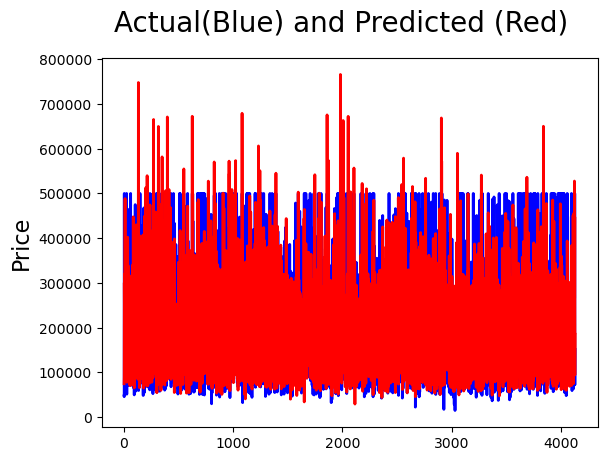

In [ ]:
prediction_vs_price()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_ = r2_score(y_test, y_pred)


print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R2_score: ", r2_)

Mean Squared Error:  4551865344.0
Root Mean Squared Error:  67467.515625
Mean Absolute Error:  45181.49609375
R2_score:  0.6526378393173218


## Ploting the Learning Curve

Text(0.5, 0, 'Epochs')

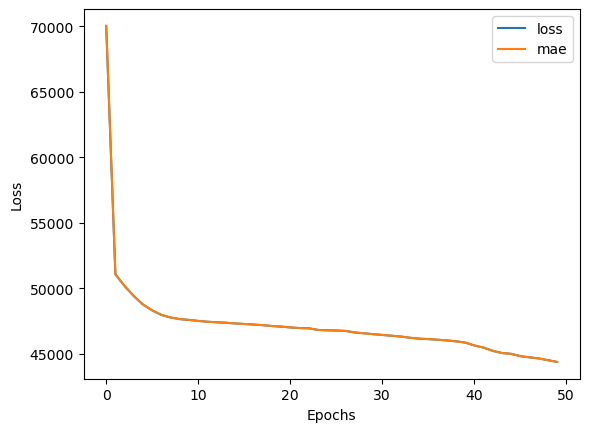

In [ ]:
## Plot History (Learning Curve/Rate)
pd.DataFrame(history_1.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

## Importing the LinearRegression model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Imported_LR_Model = LinearRegression().fit(x_train_normal,y_train)

In [ ]:
Imported_LR_Model.score(x_train_normal, y_train)

0.6376238944960032

In [ ]:
Imported_LR_Model.coef_

array([   61788.21309667,  -289226.36792455,   531121.48720143,
       -1329271.24236614,   467455.64549225,   589568.34470455,
         -21000.17790807,   -89604.7561767 ,   136877.16226383,
         -17771.93062699,    -8500.29755208])

In [ ]:
Imported_LR_Model.intercept_

66814.57600442055

In [ ]:
y_pred = Imported_LR_Model.predict(x_test_normal)
y_pred

array([ 63281.60744512, 104176.45561453, 273350.4293566 , ...,
       428523.54970786, 123181.32847593, 186465.14870333])

## Using Metrics to evalute the model

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_ = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R2_score: ", r2_)

Mean Squared Error:  5029139432.104252
Root Mean Squared Error:  70916.42568618536
Mean Absolute Error:  51248.50008495406
R2_score:  0.6162160428070788


Text(0, 0.5, 'Price')

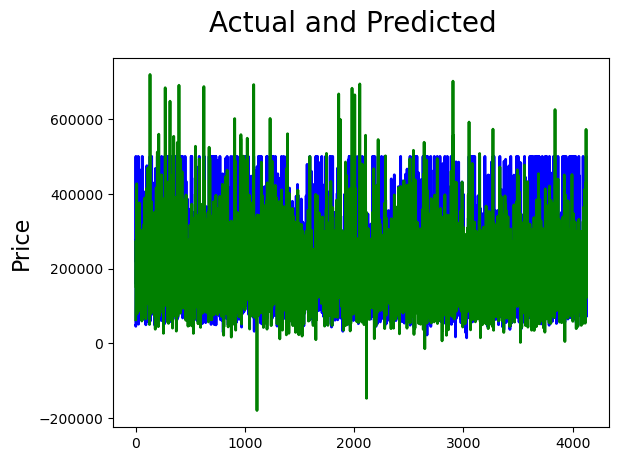

In [ ]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,4129,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="green",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.ylabel('Price', fontsize=16)

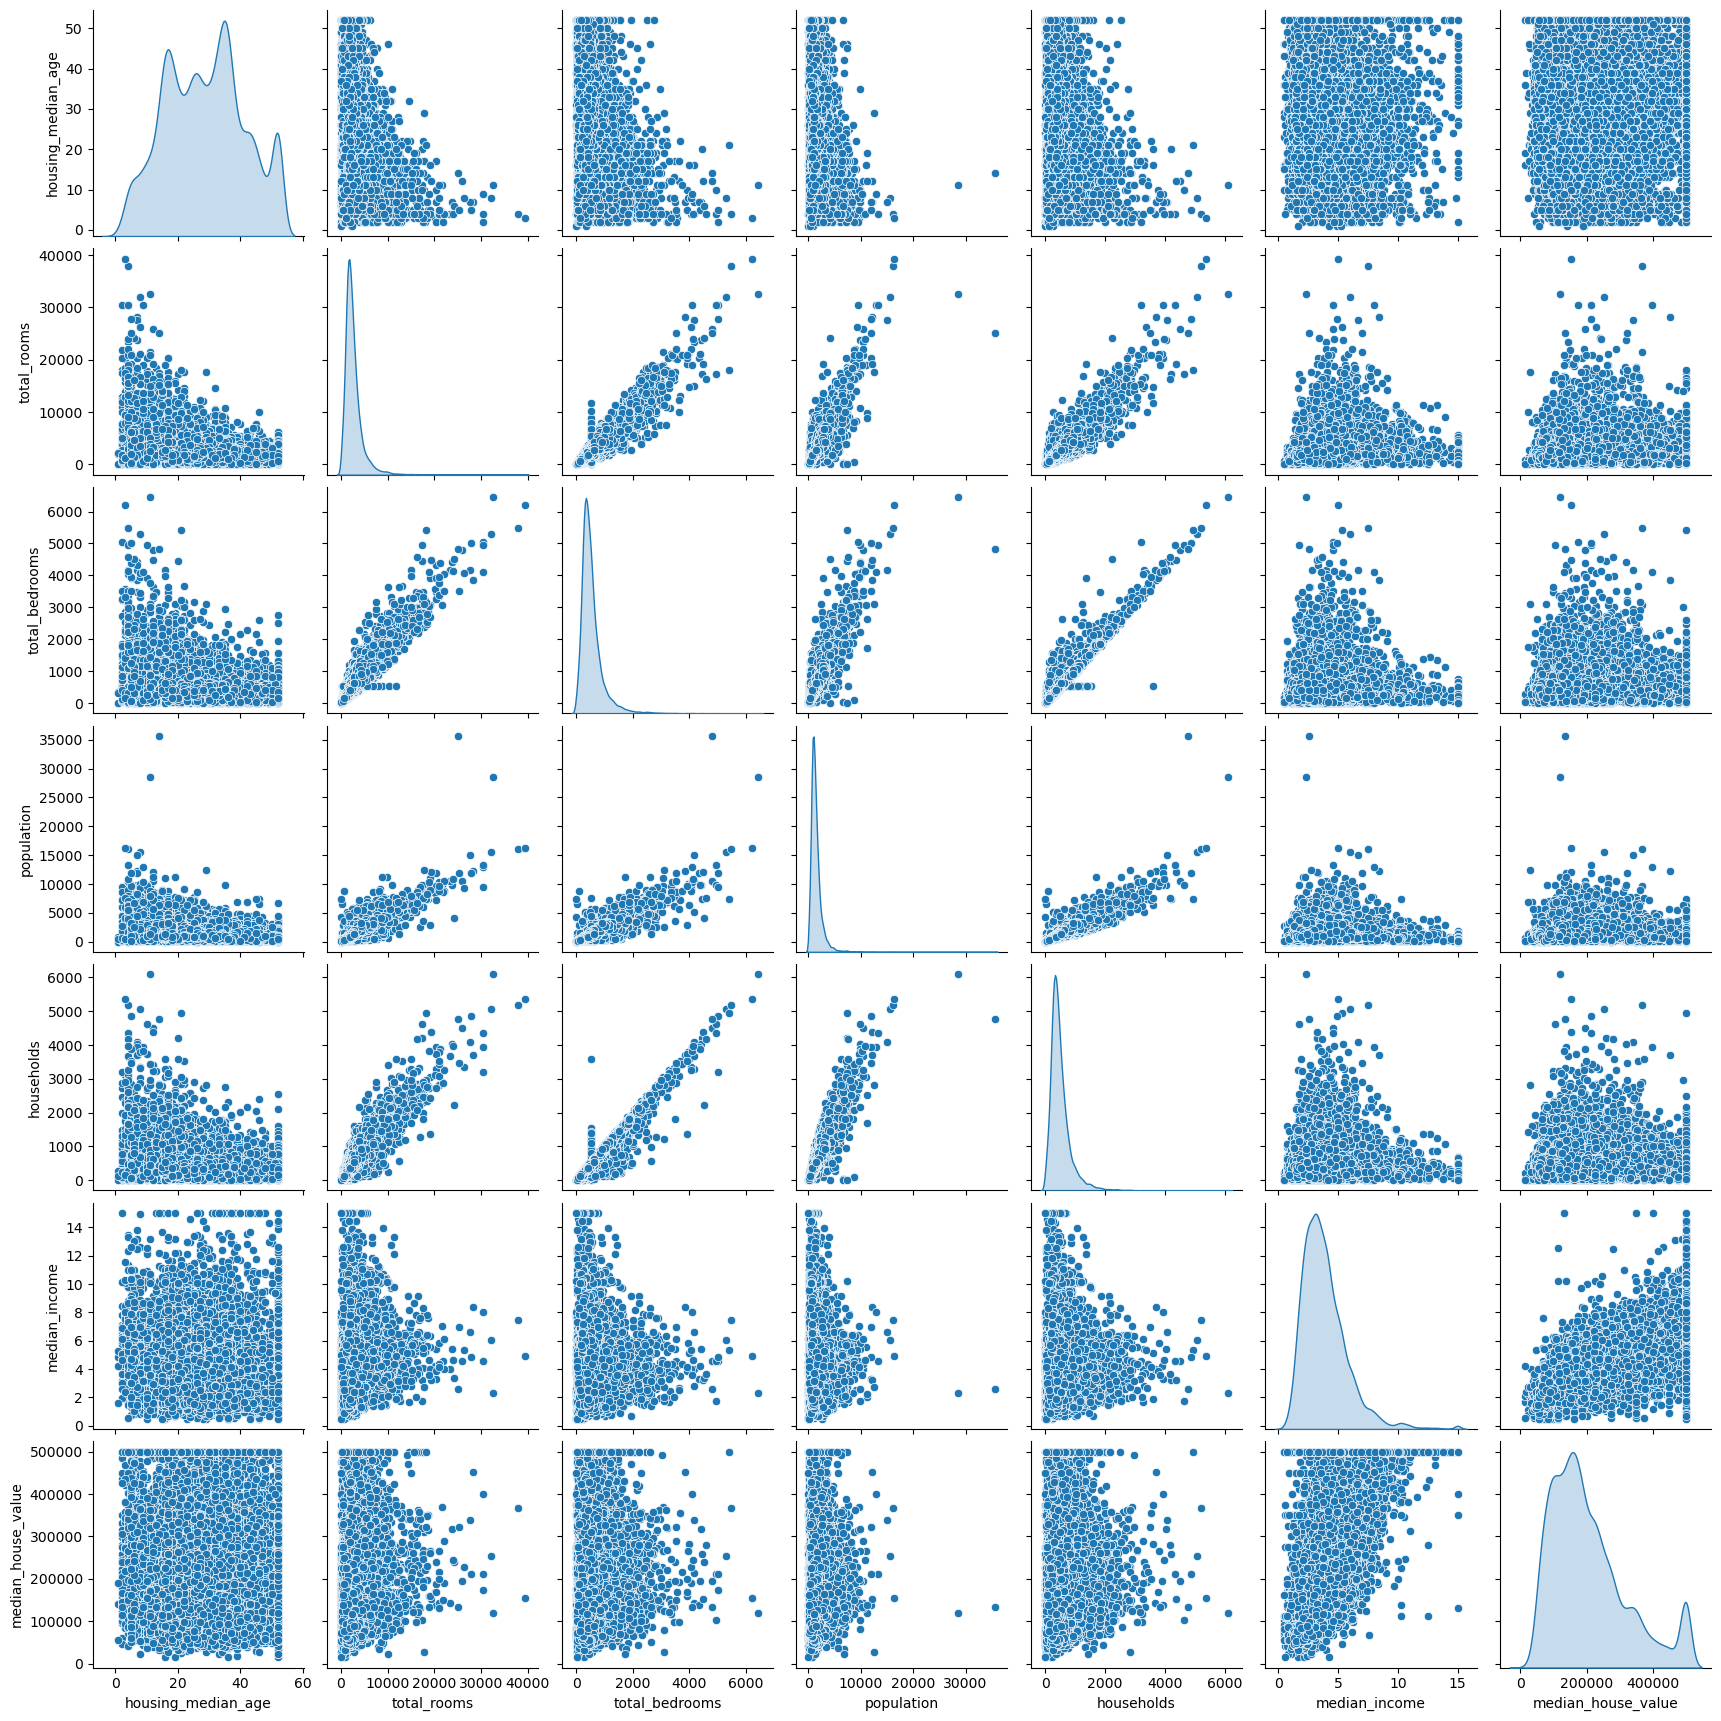

In [ ]:
sns.pairplot(data=df, diag_kind='kde')

## Improving the model

#### The next Model I will be build will have 5 layers with 100, 50, 25, 10 and 1 neurons and train it for 300 epochs

In [ ]:
# set random seed

tf.random.set_seed(42)

# 1. Create a model

H_2_Model = tf.keras.Sequential([
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(50, activation="relu"),
tf.keras.layers.Dense(25, activation="relu"),
tf.keras.layers.Dense(10, activation="relu"),
tf.keras.layers.Dense(1, activation="linear"),
])

# 2. Compile the model

H_2_Model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["mae"])

# 3. Fit the model

history_2 = H_2_Model.fit(x_train_normal, y_train, epochs=300, verbose=0)

In [ ]:
y_pred_2 = H_2_Model.predict(x_test_normal)
y_pred_2

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


array([[ 57372.004],
       [ 80357.445],
       [352635.4  ],
       ...,
       [489343.6  ],
       [ 84539.09 ],
       [180782.66 ]], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import numpy as np
def evaluations(y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2_ = r2_score(y_test, y_pred)

    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("Mean Absolute Error: ", mae)
    print("R2_score: ", r2_)

In [ ]:
evaluations(y_pred_2)

Mean Squared Error:  4092428544.0
Root Mean Squared Error:  63972.09375
Mean Absolute Error:  42072.1875
R2_score:  0.6876983642578125


In [ ]:
# Actual vs Predicted
import matplotlib.pyplot as plt

def graph(y_pred):
    c = [i for i in range(1,4129,1)]         # generating index
    fig = plt.figure()
    plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
    plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
    fig.suptitle('Actual (Blue) and Predicted (Red)', fontsize=20)              # Plot heading
    plt.ylabel('Price', fontsize=16)

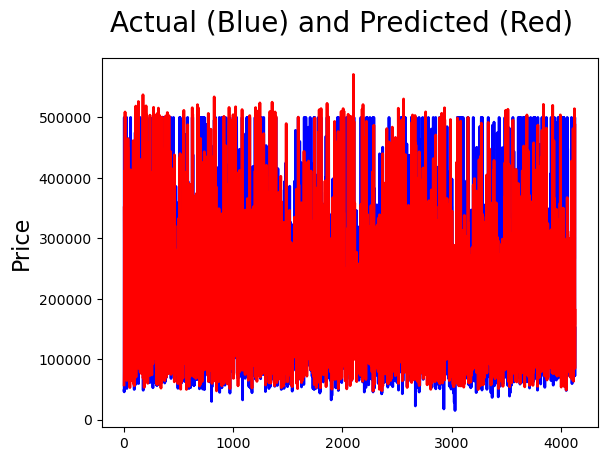

In [ ]:
graph(y_pred_2)

In [ ]:
## Plot History (Learning Curve/Rate)
def learning_curve(history):
    pd.DataFrame(history.history).plot()
    plt.ylabel("Loss")
    plt.xlabel("Epochs")

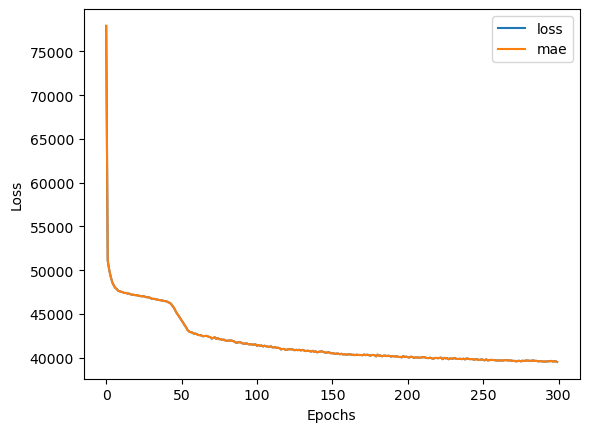

In [ ]:
learning_curve(history_2)

In [ ]:
Evaluate_Imodel_1 = H_2_Model.evaluate(x_test_normal, y_test)
Evaluate_Imodel_1

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 45298.4336 - mae: 45298.4336


[42072.18359375, 42072.18359375]